<a href="https://colab.research.google.com/github/barrafcm/projetos_data_science/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19: Analisando os dados da pandemia

*Por Felipe Caldoncelli Barra Melo*

![COVID -19](https://abcreporter.com.br/wp-content/uploads/2020/03/Coronavirus-AbcReporter.jpg)

2020, sem sombra de dúvidas, é um ano atípico. As boas perspectivas econômicas logo deram lugar a um cenário de incertezas que para muitos remonta à época da Segunda Guerra Mundial.

Tudo isto teve início quando, por volta de meados de janeiro, notícias de uma epidemia ainda desconhecida se alastrava pela província de Wuhan, na China. As informações eram ainda bastante escassas e, inicialmente, pensava-se que a epidemia poderia ser contida.

Entretanto, este panorama mudou rapidamente ao chegar ao mundo ocidental. A Itália foi assolada pela rápida propogação do Novo Coronavírus. O pânico instalou-se na sociedade quando as pessoas perceberam o potencial letal da doença.

Muitos dos pacientes precisavam de internação e, até, de ventilação mecânica para conseguir tratar da insufiência respiratória decorrente da infecção. Ocorre que, a doença tinha rápido contágio e a estrutura hospitalar logo se mostrou insuficiente para receber esta demanda repentina. A solução passou a ser diminuir a velocidade de avanço do vírus, na maioria das vezes por meio de medidas de distanciamento social.

A batalha contra a COVID-19 ainda está londe de chegar ao fim. Enquanto cientistas tentam encontrar tratamentos e vacinas para a doença, formuladores de políticas públicas estudam meios de ser mais eficiente no combate à pandemia.

Neste contexto, a análise dos dados abertos é fundamental para entender este cenário em constante desenvolvimento e planejar as ações futuras. A informação é uma arma no enfrentamento à pandemia. Desta forma, este artigo visa por meio de *Data Science* apresentar a situação da COVID-19 no Brasil e no mundo. 

## Obtenção dos dados

Os dados utilizados neste estudo foram obtidos por meio do website [Our World in Data]("https://ourworldindata.org/coronavirus#coronavirus-country-profiles"). As informações apresentadas foram atualizadas até o dia 28 de junho de 2020.

Para saber mais detalhes sobre os mecanismos utilizados pelo website na obtenção e tratamento dos dados, consulte esta [página do Github.]("https://github.com/owid/covid-19-data/tree/master/public/data")

Iniciou-se a exploração dos dados pela importação das bibliotecas e da base de dados no formato `*.csv`

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

datapath = "https://github.com/barrafcm/projetos_data_science/blob/master/owid-covid-data.csv?raw=true"
df = pd.read_csv(datapath)

As cinco primeiras entradas do dataset apresentam a seguinte disposição:

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
print(f"O Data Set possui: \n {df.shape[0]} entradas \n {df.shape[1]} variáveis")

O Data Set possui: 
 26749 entradas 
 34 variáveis


As entradas representam a situação de cada país em um determinado dia, iniciando em 31 de dezembro de 2019.

## Índice de variáveis

As variáveis utilizadas neste estudo serão as seguintes:

`iso_code` -	ISO 3166-1 alpha-3 – código de 3 letras para o país.

`continent` -	Continente do país.	

`location` -	Localização geográfica.

`date` -	Data da observação.

`total_cases` -	Total de casos confirmados para COVID-19.

`new_cases` -	Novos casos confirmados de COVID-19.

`total_deaths` -	Total de mortes atribuídas ao COVID-19.	

`new_deaths` -	Novas mortes atribuídas ao COVID-19.

`total_cases_per_million` -	Total de casos confirmados de COVID-19 por 1.000.000 de habitantes.

`new_cases_per_million` -	Novos casos confirmados de COVID-19 por 1.000.000 de habitantes.

`total_deaths_per_million` -	Total de mortes atribuídas ao COVID-19 por 1.000.000 de habitantes.

`new_deaths_per_million`-	Novas mortes atribuídas ao COVID-19 por 1.000.000 de habitantes.

`total_tests` -	Total de testes para COVID-19.

`new_tests` -	Novos testes para COVID-19.

`new_tests_smoothed` -	Novos testes para COVID-19 (Média dos últimos 7 dias).

`total_tests_per_thousand` - Total de testes para COVID-19 por 1.000 habitantes.

`new_tests_per_thousand` -	Novos testes para COVID-19 por 1.000 habitantes.

`new_tests_smoothed_per_thousand`- Novos testes para COVID-19 por 1.000 habitantes (Média dos últimos 7 dias).

`stringency_index` - Índice de rigor das medidas do governo: medida composta por 9 indicadores, incluindo fechamento de escolas, locais de trabalho e restrições a viagens. Escala de valor entre 0 e 100 (100 = resposta mais rigorosa). Fonte: Oxford COVID-19 Government Response Tracker, Blavatnik School of Government

`population` -	População em 2020.

`median_age` - Mediana da indade da população.

`aged_65_older` -	Parcela da população maior de 65 anos.

`aged_70_older` - Parcela da população maior de 70 anos.

`gdp_per_capita` - Produto Interno Bruto per capita (US$).

`population_density` - Número de habitantes por km2.

`extreme_poverty` -	Parcela da população vivando em extrema pobreza.

`cvd_death_rate` - Taxa de óbito por doença cardiovascular.

`diabetes_prevalence` -	Prevalência de diabetes (% da população entre 20 e 79 anos).

`female_smokers` - Parcela da população feminina fumante.

`male_smokers` - Parcela da população feminina fumante.

`handwashing_facilities` - Parcela da população com acesso a facilidades para lavar as mãos.

`hospital_beds_per_thousand` - Número de leitos hospitalares por 1.000 habitantes.

`life_expectancy` -	Expectativa de vida ao nascer.

Os dados relativos aos números de infecções e mortes por COVID-19 são do *European Centre for Disease Prevention and Control*

As fontes de cada dado, bem como o *codebook* original do dataset podem ser checadas nesta [página.]("https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.") 

Verificando os tipos de dados observamos que a variável `date` é do tipo *object*. Iremos transformá-la em formato de data.

In [ ]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [ ]:
df.date = pd.to_datetime(df.date)

Verificamos agora uma amostra convertida da varável `date`:

In [ ]:
df.date

0       2019-12-31
1       2020-01-01
2       2020-01-02
3       2020-01-03
4       2020-01-04
           ...    
26744   2020-02-28
26745   2020-02-29
26746   2020-03-01
26747   2020-03-02
26748   2020-03-10
Name: date, Length: 26749, dtype: datetime64[ns]

Passamos agora a verificar o percentual de dados ausentes por variáveis. Percebe-se que há grande prevalência de dados faltantes relativos à testagem.

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

new_tests                          0.743990
new_tests_per_thousand             0.743990
total_tests_per_thousand           0.718756
total_tests                        0.718756
new_tests_smoothed_per_thousand    0.695764
new_tests_smoothed                 0.695764
tests_units                        0.672623
handwashing_facilities             0.592433
extreme_poverty                    0.403080
male_smokers                       0.283637
female_smokers                     0.275263
stringency_index                   0.201092
hospital_beds_per_thousand         0.173128
aged_65_older                      0.109350
gdp_per_capita                     0.106808
aged_70_older                      0.101200
median_age                         0.096564
cvd_death_rate                     0.095443
diabetes_prevalence                0.066133
population_density                 0.043553
life_expectancy                    0.013870
new_deaths_per_million             0.010430
total_deaths_per_million        

## Panorama Mundial

Iniciaremos a análise dos dados pelo panorama mundial da COVID-19. Isto nos ajudará a entender como a pandemia chegou ao estágio atual e a desenvolver as análises posteriores.

Inicialmente iremos verificar a data mais atual do dataset e visualizar os países que, na data, possuem os maiores números de casos e de mortes.

In [ ]:
max(df.date)

Timestamp('2020-06-28 00:00:00')

In [ ]:
df[df.date == "2020-06-28"].tail(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
26684,OWID_WRL,NaN,World,2020-06-28,9952507.0,180989.0,498519.0,4623.0,1276.814,23.219,63.955,0.593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58


A última atualização do dataset ocorreu em 28 de junho de 2020, conforme havia sido descrito anteriormente.

Neste momento, o mundo inteiro já contabilizou quase 10 milhóes de casos de COVID-19, dos quais, quase meio milhão levaram ao óbito da vítima.

A pandemia é um problema muito sério à sociedade e parece estar distante de uma solução, pois somente no último dia considerado, mais de 4.600 pessoas morreram devido ao Coronavírus.

### Países com o maior número de casos

Na tabela abaixo são apresentados os países que lideram o número de casos de COVID-19 no mundo.

In [35]:
top10_cases = df.loc[df.date == '2020-06-28'].sort_values(by="total_cases", ascending=False)[1:11]
top10_cases[["iso_code", "continent", "location", "date", "total_cases"]]

,iso_code,continent,location,date,total_cases
25458,USA,North America,United States,2020-06-28,2510323.0
3628,BRA,South America,Brazil,2020-06-28,1313667.0
20202,RUS,Europe,Russia,2020-06-28,627646.0
11303,IND,Asia,India,2020-06-28,528859.0
25277,GBR,Europe,United Kingdom,2020-06-28,310250.0
19159,PER,South America,Peru,2020-06-28,275989.0
5124,CHL,South America,Chile,2020-06-28,267766.0
12479,ITA,Europe,Italy,2020-06-28,240136.0
11658,IRN,Asia,Iran,2020-06-28,220180.0
15937,MEX,North America,Mexico,2020-06-28,212802.0


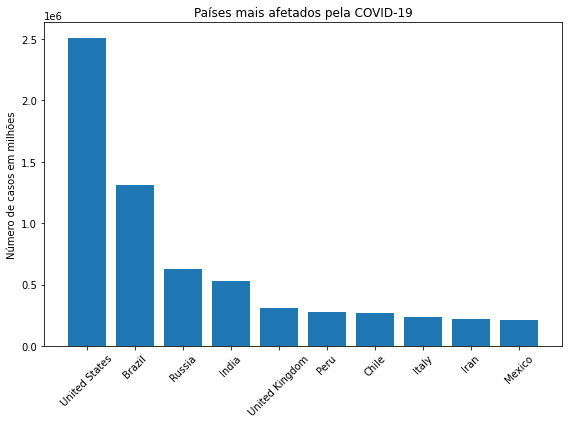

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar("location","total_cases",data= top10_cases)
ax.set_xticklabels(top10_cases.location, rotation=45)
ax.set_ylabel("Número de casos em milhões")
ax.set_title("Países mais afetados pela COVID-19")

plt.tight_layout()

O Estados Unidos lideram o ranking de casos com mais de 2.5 milhões, seguidos, infelizmente, pelo Brasil com 1.3 mi. Países bastante populosos como Rússia e Índia vem na sequência. A população dos países é, sem dúvida, um fator que influencia este ranking. A confiabilidade das fontes é outro fator a ser considerado e influenciará todas as análises posteriores. Diversos países são acusados de "maquiar" seus números, reduzindo a severidade da pandemia (inclusive o Brasil). A Rússia é um desses casos e a China é, possivelmente, outro. Levanta suspeitas o fato de o país onde surgiu a pandemia, desconhecida por longo tempo, não estar entre os primeiros deste ranking.

### Número de mortes por COVID-19

Outro indicador, tão importante quanto o número de casos, é o número de mortes atribuídas à COVID-19. Uma vez que, sabidamente, não conseguimos testar todas as pessoas que são infectadas, por vezes este é um indicador mais confiável.

A tabela e o gráfico abaixo apresentam os dez países com o maior número de mortes pelo COVID-19.

In [36]:
top_10_deaths = df.loc[df.date == "2020-06-28"].sort_values(by="total_deaths", ascending=False)[1:11]
top_10_deaths[["iso_code", "continent", "location", "date", "total_deaths"]]

,iso_code,continent,location,date,total_deaths
25458,USA,North America,United States,2020-06-28,125539.0
3628,BRA,South America,Brazil,2020-06-28,57070.0
25277,GBR,Europe,United Kingdom,2020-06-28,43514.0
12479,ITA,Europe,Italy,2020-06-28,34716.0
8737,FRA,Europe,France,2020-06-28,29778.0
15937,MEX,North America,Mexico,2020-06-28,26381.0
11303,IND,Asia,India,2020-06-28,16095.0
11658,IRN,Asia,Iran,2020-06-28,10364.0
2644,BEL,Europe,Belgium,2020-06-28,9732.0
19159,PER,South America,Peru,2020-06-28,9135.0


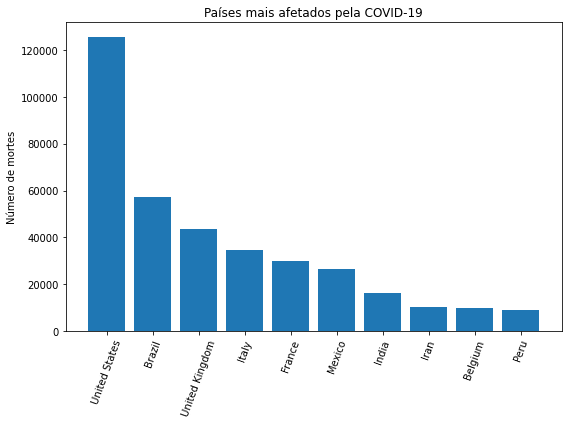

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar("location", "total_deaths", data=top_10_deaths)
ax.set_xticklabels(top_10_deaths.location, rotation=70)
ax.set_title("Países mais afetados pela COVID-19")
ax.set_ylabel("Número de mortes")

plt.tight_layout()

Os Estados Unidos novamente encabeçam a relação com mais de 120 mil mortes. Na sequência vem o Brasil. Chama a atenção o bloco de países europeus nas 3 posições seguintes, que apesar da menor população tiveram muitas mortes. Fechando a lista temos países em desenvolvimento como México, India e Peru. Além da Bélgica, também pequeno país europeu, e do Irã, que foi varrido rapidamente pela pandemia.

Dadas as enormes diferenças populacionais, sociais e geográficas entre os países, vamos passar a focar dados relativos da pandemia.

### COVID-19 em função da população

A análise dos números absolutos tende a deixar países mais populosos em maior evidência. Esta tendência fica bastante perceptível na análise dos países com o maior número de casos.

Vamos agora analisar os países com os maiores número de casos e mortes ajustado ao tamanho da sua população.

### Número de casos por milhão de habitantes

Na tabela e no gráfico abaixo são apresentados os 10 países com o maior número de casos por milhão de habitantes.

In [38]:
top_10_cases_per_million = df.loc[df.date == "2020-06-28"].sort_values(by="total_cases_per_million", ascending=False)[0:11]
top_10_cases_per_million[["iso_code", "continent", "location", "date", "total_cases_per_million", "total_cases"]]

,iso_code,continent,location,date,total_cases_per_million,total_cases
19842,QAT,Asia,Qatar,2020-06-28,32509.910,93663.0
20786,SMR,Europe,San Marino,2020-06-28,20566.916,698.0
2062,BHR,Asia,Bahrain,2020-06-28,14849.114,25267.0
25871,VAT,Europe,Vatican,2020-06-28,14833.127,12.0
5124,CHL,South America,Chile,2020-06-28,14007.275,267766.0
565,AND,Europe,Andorra,2020-06-28,11065.812,855.0
13483,KWT,Asia,Kuwait,2020-06-28,10394.648,44391.0
19159,PER,South America,Peru,2020-06-28,8370.444,275989.0
1145,ARM,Asia,Armenia,2020-06-28,8316.927,24645.0
25458,USA,North America,United States,2020-06-28,7583.997,2510323.0


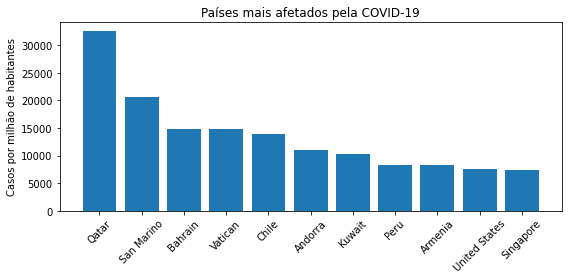

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

ax.bar("location", "total_cases_per_million", data=top_10_cases_per_million)
ax.set_xticklabels(top_10_cases_per_million.location, rotation = 45)
ax.set_title("Países mais afetados pela COVID-19")
ax.set_ylabel("Casos por milhão de habitantes")

plt.tight_layout()

Quando analisamos o número de casos por milhão de habitantes o panorama tende a se inverter. Podemos perceber que a maior parte dos países com maior proporção de casos são pequenos, exceção feita a Chile, EUA e Peru.

O pequeno número total de casos (vide tabela acima) costuma a não chamar a atenção da mídia para o grau de exposição que a população destes países tem ao vírus.

### Número de mortes por milhão de habitantes

Outro fator extremamente importante na análise dos efeitos da pandemia é o número de mortes por milhão de habitantes. A partir deste dado podemos traçar paralelos com o perfil populacional, atendimento hospitalar e medidas restritivas, por exemplo.

In [ ]:
top_10_deaths_per_million = df.loc[df.date == "2020-06-28"].sort_values(by="total_deaths_per_million", ascending=False)[0:10]
top_10_deaths_per_million[["continent","location", "total_deaths_per_million", "total_deaths"]]


,continent,location,total_deaths_per_million,total_deaths
20786,Europe,San Marino,1237.551,42.0
2644,Europe,Belgium,839.717,9732.0
565,Europe,Andorra,673.008,52.0
25277,Europe,United Kingdom,640.986,43514.0
12479,Europe,Italy,574.180,34716.0
23283,Europe,Sweden,522.810,5280.0
8737,Europe,France,456.203,29778.0
25458,North America,United States,379.269,125539.0
17331,Europe,Netherlands,356.291,6105.0
12017,Europe,Ireland,351.169,1734.0


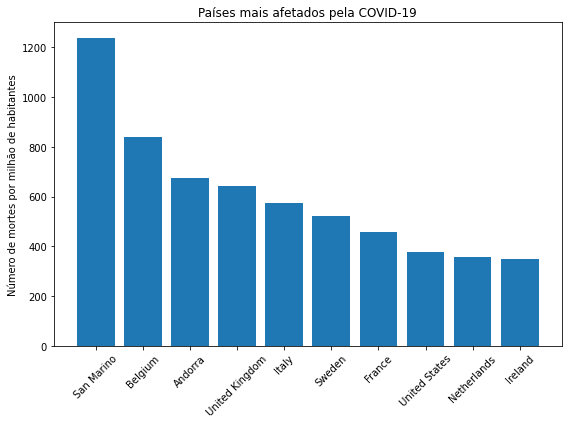

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar("location", "total_deaths_per_million", data=top_10_deaths_per_million)
ax.set_xticklabels(top_10_deaths_per_million.location, rotation=45)
ax.set_ylabel("Número de mortes por milhão de habitantes")
ax.set_title("Países mais afetados pela COVID-19")

plt.tight_layout()

Ao analisarmos os países que mais tiveram mortes por milhão de habitantes a situação novamente se modifica. Percebe-se uma maior prevalência de países europeus. A exceção são os EUA na 7ª posição. 

Esta tendência faz levar a crer, aliado a estudos médicos, que a idade é fator preponderante na mortalidade pelo COVID-19. Países europeus, geralmente com perfil populacional mais idoso, tenderam a ser proporcionalmente mais afetados.

Exploraremos na sequência algumas correlações entre variáveis.

### Correlação entre as variáveis



Inicialmente criaremos um novo dataset com os dados de todos os países para o dia 28 de junho de 2020.

In [ ]:
last_status = df.loc[df.date == "2020-06-28"][:-1]
last_status

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
170,AFG,Asia,Afghanistan,2020-06-28,30616.0,165.0,703.0,20.0,786.471,4.239,18.059,0.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83
282,ALB,Europe,Albania,2020-06-28,2330.0,61.0,53.0,2.0,809.646,21.197,18.417,0.695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
458,DZA,Africa,Algeria,2020-06-28,12968.0,283.0,892.0,7.0,295.728,6.454,20.342,0.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88
565,AND,Europe,Andorra,2020-06-28,855.0,0.0,52.0,0.0,11065.812,0.000,673.008,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
664,AGO,Africa,Angola,2020-06-28,244.0,32.0,10.0,0.0,7.424,0.974,0.304,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26157,VNM,Asia,Vietnam,2020-06-28,354.0,1.0,0.0,0.0,3.637,0.010,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97338583.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40
26221,ESH,Africa,Western Sahara,2020-06-28,208.0,183.0,1.0,0.0,348.216,306.363,1.674,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597330.0,NaN,28.4,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.26
26301,YEM,Asia,Yemen,2020-06-28,1103.0,14.0,296.0,3.0,36.981,0.469,9.924,0.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29825968.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12
26403,ZMB,Africa,Zambia,2020-06-28,1531.0,0.0,21.0,0.0,83.279,0.000,1.142,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18383956.0,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89


Foram retirados os dados relativos aos testes para a identificação de COVID-19, uma vez que havia grande número de dados faltantes e gerado um mapa de calor de correlações.

In [ ]:
last_status_dropped = last_status.drop(["total_tests", "new_tests", "total_tests_per_thousand", "new_tests_per_thousand", "new_tests_smoothed", "new_tests_smoothed_per_thousand" ], axis=1).corr()

last_status_dropped

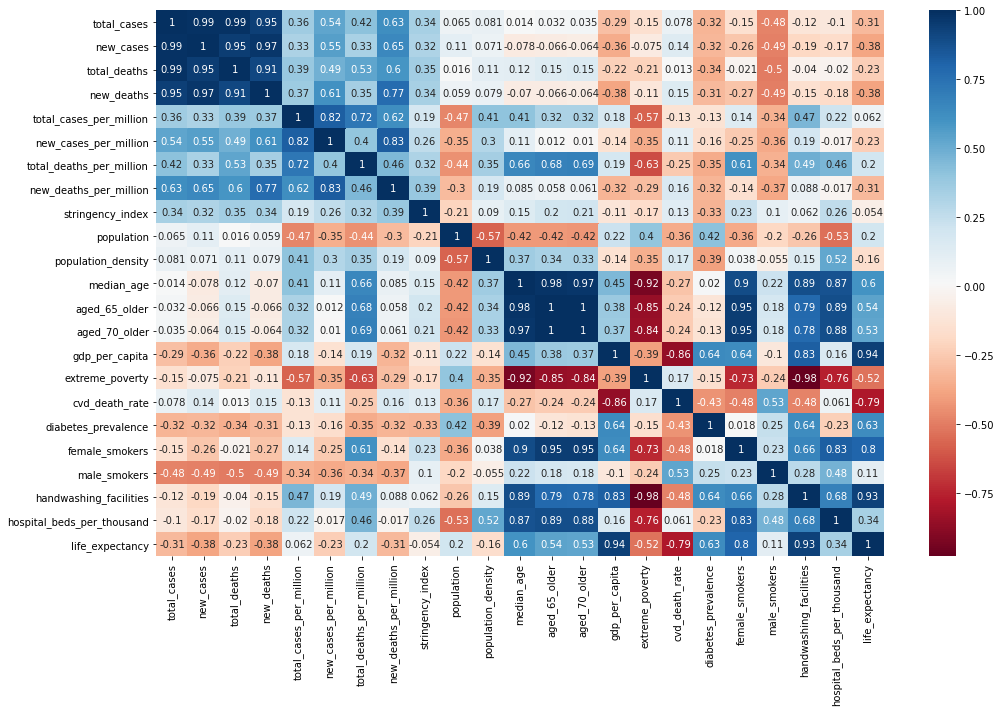

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(last_status_dropped.corr(), square=False, cmap='RdBu', annot=True)

plt.tight_layout()

A análise da correlação entre os dados de todos os países para o dia 28 de junho de 2020 traz alguns insights interessantes.  

Existe um primeiro bloco de correlações altamente positivas entre `total_cases`, `new_cases`, `total_deaths` e `new_deaths`. Estas se explicam pois, claramente todos estes aumentam e tem relação uns com os outros. À medida que surgem novos casos, os casos totais aumantam, bem como as novas mortes e seu total. 

As correlações positivas, agora em menor intensidade, também formam um outro bloco nestas mesmas variáveis ajustadas por milhão de habitantes.

Um outro bloco de dados de interesse se refere à idade, varáveis `median_age`, `aged_65_older`, `aged_70_older`. A coorelação entre estes é clara, o grande número de idosos faz com que a idade média suba. Mas não é essa a informação importante. Do ponto de vista da COVID-19, chama a atenção a correlação fortemente positiva com o número de mortes por milhão de habitantes. Isto corrobora as informações dos estudos epidemiológicos que indicam que os idosos são uma população de grande risco para a doença. A despeito de fatores socioeconômicos positivos à essa população, como a correlação bastante positiva com a disponibilidade de leitos (provavelmente devida aos países mais ricos possuirem população mais idosa), a mortalidade nesta faixa etária e nos países mais envelhecidos tende a ser bastante alta.

Para finalizar esta análise de nível global, gostaria de ressaltar a correlação quase nula da taxa de problemas cardíacos e levemente negativa da população diabética com o total de mortes por milhão de habitantes. Estudos médicos mais recentes apontam na direção contrária, especialmente no caso da diabetes e da obesidade.

A análise dos fatores médicos que aumentam a predisposição a complicações com o Coronavírus seria melhor estudada separando somente a população infectada ou que veio a óbito. Esta análise vem sendo feita por instituições médicas. Como não temos acesso a esses dados neste banco de dados, será feita uma análise a partir de perfil médio da população.  

Como os países estão em estágios diferentes na evolução da pandemia. Para podermos traçar um melhor perfil sobre os fatores que influenciam a taxa de mortalidade, vamos estudar os 30 países com maiores que mais sofreram fatalidades por milhão de habitantes. Para diminuir outliers, foi optado por considerar para este cálculo somente países com 10 ou mais mortes por COVID-19.

Os 30 países com maior número de mortes por milhão de habitantes são mostrados abaixo:


In [ ]:
death_per_million_top30 = df.loc[df.date == "2020-06-28"].sort_values("total_deaths_per_million", ascending=False)[0:31]
death_per_million_top30_10death_plus = death_per_million_top30.loc[death_per_million_top30.total_deaths >= 10].sort_values("total_deaths_per_million", ascending=False)[0:31]
death_per_mil_top30_10deathplus_drop = death_per_million_top30_10death_plus.drop(["total_tests", "new_tests", "total_tests_per_thousand", "new_tests_per_thousand", "new_tests_smoothed", "new_tests_smoothed_per_thousand" ], axis=1)
death_per_million_top30_10death_plus[["location","continent", "total_deaths_per_million", "total_deaths", "total_cases"]]

,location,continent,total_deaths_per_million,total_deaths,total_cases
20786,San Marino,Europe,1237.551,42.0,698.0
2644,Belgium,Europe,839.717,9732.0,61209.0
565,Andorra,Europe,673.008,52.0,855.0
25277,United Kingdom,Europe,640.986,43514.0,310250.0
12479,Italy,Europe,574.180,34716.0,240136.0
23283,Sweden,Europe,522.810,5280.0,65137.0
8737,France,Europe,456.203,29778.0,162936.0
25458,United States,North America,379.269,125539.0,2510323.0
17331,Netherlands,Europe,356.291,6105.0,50074.0
12017,Ireland,Europe,351.169,1734.0,25437.0


O mapa de calor abaixo apresenta a correlação de variáveis para este grupo de países. 

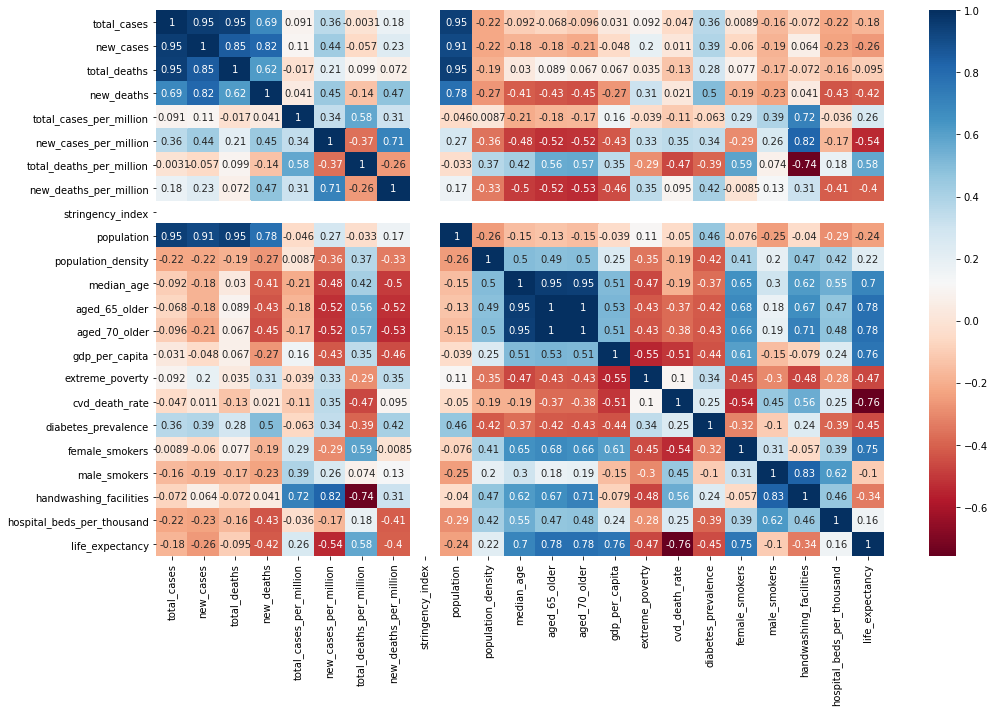

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(death_per_mil_top30_10deathplus_drop.corr(), cmap="RdBu", annot=True)

plt.tight_layout()

Um novo panorama médico parece ser observado na correlação dos países com maior número da casos por milhão de habitantes. Nessa análise, a prevalência de diabetes parece ganhar mais importância em relação ao total de mortes e novas mortes por milhão. Mas, ainda sim, apresenta correlação negativa com o total de mortes por milhão de habitantes. Na contramão, a idade avançada ainda mantém forte correlação com o número de mortes por milhão. Entretanto, a correlação passa a ser negativa com as novas mortes, tanto na variável absoluta como na relativa. 

Estas correlações, juntamente com o noticiário parecem reforçar o entendimento que a pandemia desacelera na Europa (onde a população idosa foi fortemente afetada) e passa a assolar países das Américas. Nestes países a população é mais jovem, fazendo com que o fator diabetes ganhe mais importância para as fatalidades.

A questão do crescimento de casos nas Américas parece ser indicado pela forte correlação entre novos casos e novas mortes com a variável população. Nesse sentido, países mais populosos, como EUA e Brasil (16º em mortes por milhão/hab) tem puxado as estatísticas dessas variáveis para cima. 

## Como a doença vem evoluindo no mundo ?

O gráfico abaixo mostra a evolução do número total de casos no mundo em função do tempo.

É possível perceber como a doença evoluiu rapidamente. No gráfico em escala logarítimica podemos verificar que a partir da metade de janeiro ocorre um salto de casos. Estes passam da casa das dezenas para mais de 10.000. Nesse momento, começaram a circular as primeiras notícias de uma epidemia na China.

Entre feveriero e março a doença não para de crescer e atinge um nível alto de preocupação internacional. Em um mês o número de infectados se multiplicou dez vezes. No início de março já eram mais de 100.000 diagnósticos positivos.

O mesmo ritmo de crescimento permaneceu no mês seguinte. No início de abril já tínhamos mais de um milhão de infectados pela COVID-19. Podemos perceber a "decolagem" da pandemia no gráfico linear a partir da segunda quinzena de março.

Três meses após isto, já quase no início de julho, mais uma vez multiplicamos por dez o número de casos confirmados, chegando na casa de 10 milhões.



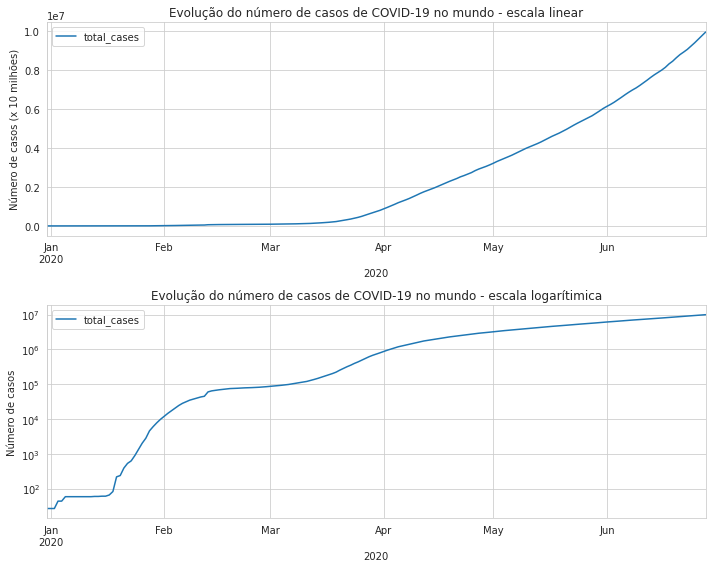

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,8), nrows=2, ncols=1)

df.loc[df.location == "World", ["date", "total_cases"]].plot(x="date", y="total_cases", ax=ax1)
df.loc[df.location == "World", ["date", "total_cases"]].plot(x="date", y="total_cases", ax=ax2)

ax1.set_title("Evolução do número de casos de COVID-19 no mundo - escala linear")
ax1.set_yscale("linear")
ax1.set_xlabel("2020")
ax1.set_ylabel("Número de casos (x 10 milhões)")

ax2.set_title("Evolução do número de casos de COVID-19 no mundo - escala logarítimica")
ax2.set_yscale("log")
ax2.set_xlabel("2020")
ax2.set_ylabel("Número de casos")

plt.tight_layout()

## Taxas de novas mortes

Uma das maiores preocupações de todo o mundo é controlar as taxas de mortalidade do COVID-19 enquanto não temos uma vacina ou tratamento eficaz.

O número de novas mortes apresenta um comportamento semelhante à evolução dos casos no mundo, discutida anteriormente.

A partir da metade de janeiro o número de mortes aumenta muito, no entanto ainda em um nível local.  Já a partir do meio de março o número de mortes diárias no mundo "explode".

A pior fase deste índice ocorre entre abril e maio, quando quase todos os dias mais de 6.000 pessoas morriam devido às complicações do COVID-19. Infelizmente, a situação atual não é muito melhor, pois as mortes diárias raramente encontram-se abaixo de 4.000.

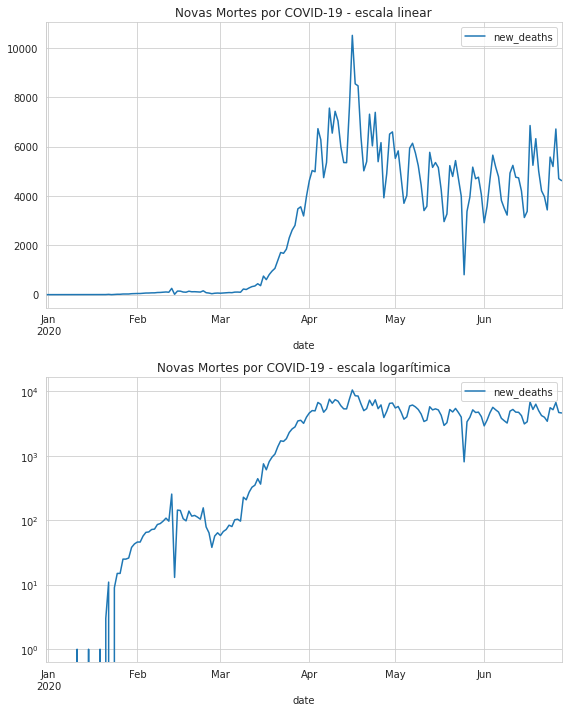

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

df.loc[df.location == "World", ["date", "new_deaths"]].plot(x="date", y="new_deaths", ax=ax1)
df.loc[df.location == "World", ["date", "new_deaths"]].plot(x="date", y="new_deaths", ax=ax2)

ax1.set_yscale("linear")
ax1.set_title("Novas Mortes por COVID-19 - escala linear")

ax2.set_title("Novas Mortes por COVID-19 - escala logarítimica")
ax2.set_yscale("log")

plt.tight_layout()

## Panorama Brasileiro 

Agora que compreendemos um pouco melhor o panorama mundial da pandemia da COVID-19, como está nosso país nesse contexto ?

Para isso vamos criar um novo dataset para o Brasil.

In [3]:
df_brasil = df[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3448,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3449,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3450,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3451,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3452,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Após isto, vamos gerar gráficos para a evolução do total de casos e de mortes no Brasil.

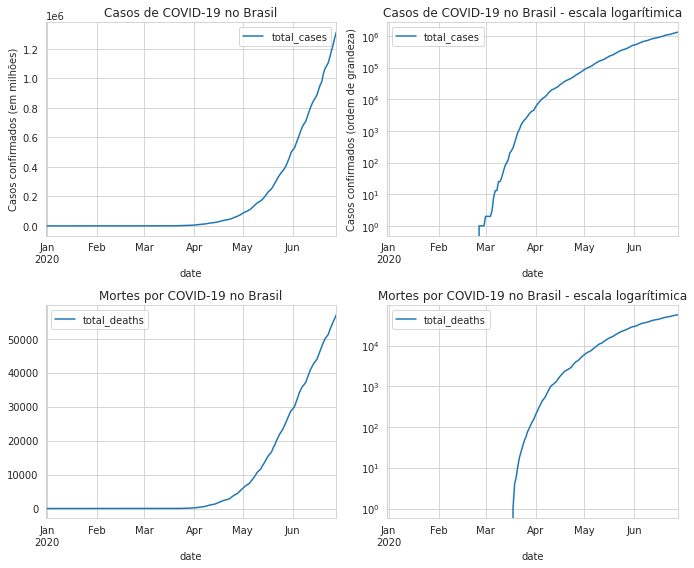

In [ ]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

df_brasil.plot(x="date", y="total_cases", ax=ax1)
df_brasil.plot(x="date", y="total_cases", ax=ax2)
df_brasil.plot(x="date", y="total_deaths", ax=ax3)
df_brasil.plot(x="date", y="total_deaths", ax=ax4)

ax1.set_title("Casos de COVID-19 no Brasil")
ax1.set_ylabel("Casos confirmados (em milhões)")
ax2.set_title("Casos de COVID-19 no Brasil - escala logarítimica")
ax2.set_ylabel("Casos confirmados (ordem de grandeza)")
ax2.set_yscale("log")
ax3.set_title("Mortes por COVID-19 no Brasil")
ax4.set_title("Mortes por COVID-19 no Brasil - escala logarítimica")
ax4.set_yscale("log")


plt.tight_layout()

A pandemia começou a mostrar seus primeiros sinais no Brasil no início de março. Desde então a evolução foi bastante rápida. O comportamento da evolução do número de casos e mortes apresetam características bastante semelhantes.

Desde abril o número de casos e mortes vem crescendo consistentemente.



### Como está a evolução dos novos casos no Brasil ?

O que o brasileiro parece querer mais saber é: quando é o pico ?
Para tentar ter uma ideia disso, vamos verificar as taxas de novos casos.

Os gráficos baixo mostram os números de novos casos e novas mortes registradas diariamente no Brasil. Ambos apresentam viés de aumento, o que parece indicar que ainda não atingimos o "topo" da curva de contágio.

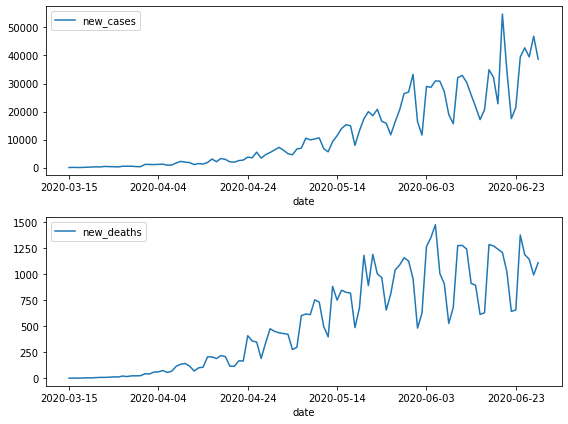

In [4]:
fig,(ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

df_brasil[df_brasil.date >= "2020-03-15"].plot(x="date", y="new_cases", ax=ax1)
df_brasil[df_brasil.date >= "2020-03-15"].plot(x="date", y="new_deaths", ax=ax2)

plt.tight_layout()

### Comparando o Brasil com outros países

Vamos agora comparar o Brasil com outros países que sofreram bastante com o COVID-19 e vem reduzindo seus níveis de contágio.

Para isso serão criados datasets para os seguintes países: Itália, Espanha, Reino Unido e Brasil. Estes novos datasets tem por início (dia 0) a data da primeira morte registrada no país. Com isso, poderemos comparar a partir de um mesmo evento como a pandemia evoluiu em cada país.

In [5]:
df_italy = df.loc[df.location == "Italy"].copy()
df_spain = df.loc[df.location == "Spain"].copy()
df_uk = df.loc[df.location == "United Kingdom"].copy()

Data da primeira morte na Itália: 23/02/2020

In [39]:
df_italy.loc[df_italy.total_deaths != 0][:1]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12353,ITA,Europe,Italy,2020-02-23,79.0,62.0,2.0,2.0,1.307,1.025,0.033,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,60461828.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51


In [ ]:
df_italy_since_1st_death = df_italy.drop(df_italy[df_italy.date < "2020-02-23"].index, axis=0)
df_italy_comp = df_italy_since_1st_death.reset_index(drop=True)
df_italy_comp.head()

Data da primeira morte na Espanha: 05/03/2020

In [ ]:
df_spain.loc[df_spain.total_deaths != 0][:1]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
22502,ESP,Europe,Spain,2020-03-05,348.0,81.0,1.0,1.0,7.443,1.732,0.021,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


In [ ]:
df_spain_since_1st_death = df_spain.drop(df_spain[df_spain.date < "2020-03-05"].index, axis=0)
df_spain_comp = df_spain_since_1st_death.reset_index(drop=True)
df_spain_comp.head()

Data da primeira morte no Reino Unido: 07/03/2020


In [ ]:
df_uk.loc[df_uk.total_deaths != 0][:1]

In [ ]:
df_uk_since_1st_death = df_uk.drop(df_uk[df_uk.date < "2020-03-07"].index, axis=0)
df_uk_comp = df_uk_since_1st_death.reset_index(drop=True)
df_uk_comp.head()

Data da primeira morte no Brasil: 18/03/2020

In [ ]:
df_brasil.loc[df_brasil.total_deaths != 0][:1]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3526,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [ ]:
df_brasil_since_1st_death = df_brasil.drop(df_brasil[df_brasil.date < "2020-03-18"].index, axis=0)
df_brasil_comp = df_brasil_since_1st_death.reset_index(drop=True)
df_brasil_comp.index.name ="dias"
df_brasil_comp.head()

### Evolução dos novos casos de COVID-19

Como falamos anteriormente, para entendermos melhor nossa situação atual e a perspectiva de evolução da pandemia em nosso país, uma das técnicas mais eficazes e comparar nossos índices com certos países de referência.

No gráfico abaixo são apresentados os números de novos casos de COVID-19 resgistrados a cada dia em função de cada milhão de habitantes. Este é um indicador importante da velocidade de propogação do vírus. A utilização do referencial relativo (número de habitantes) permite avaliar países com populações diferentes em condições de igualdade.

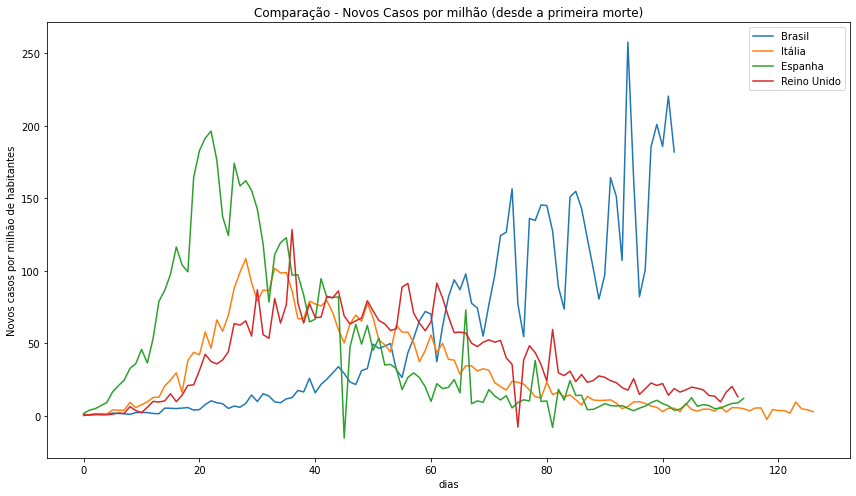

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))

df_brasil_comp.new_cases_per_million.plot()
df_italy_comp.new_cases_per_million.plot()
df_spain_comp.new_cases_per_million.plot()
df_uk_comp.new_cases_per_million.plot()
ax.legend(["Brasil", "Itália", "Espanha", "Reino Unido"])
ax.set_title("Comparação - Novos Casos por milhão (desde a primeira morte)")
ax.set_ylabel("Novos casos por milhão de habitantes")

plt.tight_layout()

O gráfico traz algumas constatações ruins para o Brasil. Aparentemente não estamos no pico das infecções. A linha referente ao nosso país está apresentando tendência de subida constante. Outro ponto negativo é que os níveis atuais de novos casos são semelhantes ao pico de contágio na Espanha e cerca de duas vezes superiores à Itália em seu pior momento. 

Em compensação, apesar de elevado, a evolução dos novos casos no Brasil tem tido um gradiente mais controlado que nos países europeus. Na Espanha o pico da transmissão ocorreu a pouco mais de 20 dias após a primeira morte, na Itália com quase 30 dias e no Reino Unido com 40. Em nosso país, já estamos com mais de 100 dias da primeira morte e o gráfico não reverteu  tendência de subida. 

A vantagem inicial de um contágio mais lento é permitir que o sistema de saúde consiga se readequar as novas necessidades pela implementação de novos leitos e de uma melhor logística.

Ocorre que, desde o 60º dia, aproximadamente, os níveis de contágio no Brasil estão muito altos. A manutenção prolongada de níveis tão altos pode fazer que mesmo um sistema mais preparado venha a colapsar. 

Uma preocupação adicional deve ser dada ao ritmo de diminuição de contágios, uma vez passado o pico. A análise dos países europeus mostra que a redução dos novos casos tende a ser bem mais gradual que seu aumento (cerca de duas vezes mais lento). No caso brasileiro, uma redução de infecções a níveis similares ao atuais na Europa ( inferior a 10 novos casos por milhão de habitantes) poderia ocorrer somente em meados de outubro. Obviamente isto é uma hipótese baseada nos exemplos apresentados. A doença no Brasil apresenta uma dinâmica própria.

De qualquer forma, a taxa de novos casos de Coronavírus deve ser observada com atenção por todos os formuladores de políticas públicas e pela população em geral.

## Comparação com os Estados Unidos

Os Estados Unidos da América são sempre uma referência para o mundo em todas as áreas.

Durante a pandemia do COVID-19 os norte-americanos lideram as estatísticas de números de casos e de mortes. O alto índice de contágio naquele país e a grande população fazem com que a comparação com o Brasil seja mais do que adequada.

Para isto, foi criado um novo *dataset* com os dados dos EUA.

O gráfico abaixo apresenta uma comparação entre o número de novos casos por milhão de habitantes:

In [11]:
df_usa = df.loc[df.location == "United States"].copy()
df_usa.loc[df_usa.total_deaths != 0][:1]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
25339,USA,North America,United States,2020-03-01,69.0,3.0,1.0,1.0,0.208,0.009,0.003,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86


In [ ]:
df_usa_since_1st_death = df_usa.drop(df_usa[df_usa.date < "2020-03-01"].index, axis=0)
df_usa_comp = df_usa_since_1st_death.reset_index(drop=True)
df_usa_comp.index.name ="dias"
df_usa_comp.head()

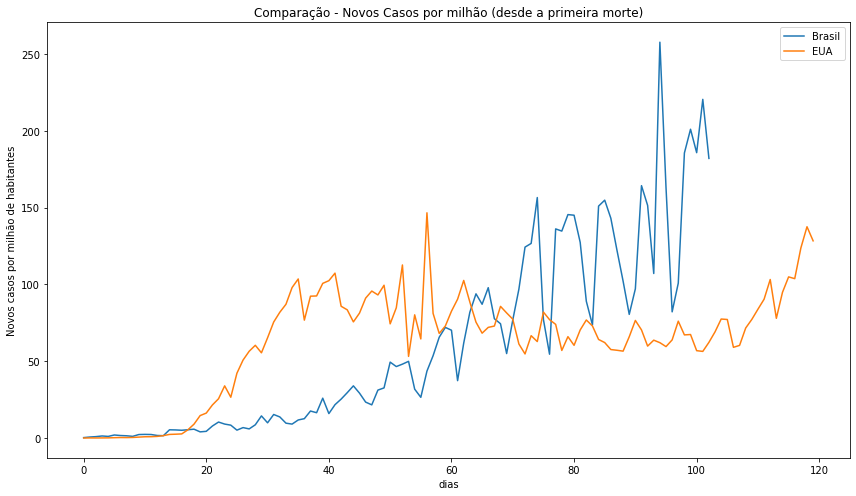

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))

df_brasil_comp.new_cases_per_million.plot()
df_usa_comp.new_cases_per_million.plot()
ax.legend(["Brasil", "EUA"])
ax.set_title("Comparação - Novos Casos por milhão (desde a primeira morte)")
ax.set_ylabel("Novos casos por milhão de habitantes")

plt.tight_layout()

Novamente observamos um menor contágio inicial no Brasil em relação aos EUA. Por volta do 70º dia a velocidade de contágio no Brasil ultrapassa a norte-americana e se mantém até os dias atuais.

É interessante observar que nos EUA houve o estabelecimento de um platô em cerca de 70 novos casos por milhão de habitantes entre o 30º e o 110º dia. Infelizmente é observada uma tendência de elevação no contágio nos últimos 15 dias.

Seria importante ao Brasil olhar o exemplo norte-americano, pois em grande medida o comportamento das curvas de contágio tem semelhanças ou pode trazer semelhanças futuras.

### Comparação entre as novas mortes por milhão de habitantes

A maior preocupação no enfrentamento à COVID-19 deve ser salvaguardar vidas. Nesse sentido o número de novas mortes é um indicador bastante importante de quão bem sucedidos estamos sendo no combate à doença.

O gráfico abaixo mostra o número de novas mortes por milhão de habitantes. Mais uma vez, a comparação relativa permite mensurar com mais igualdade diferentes países. 


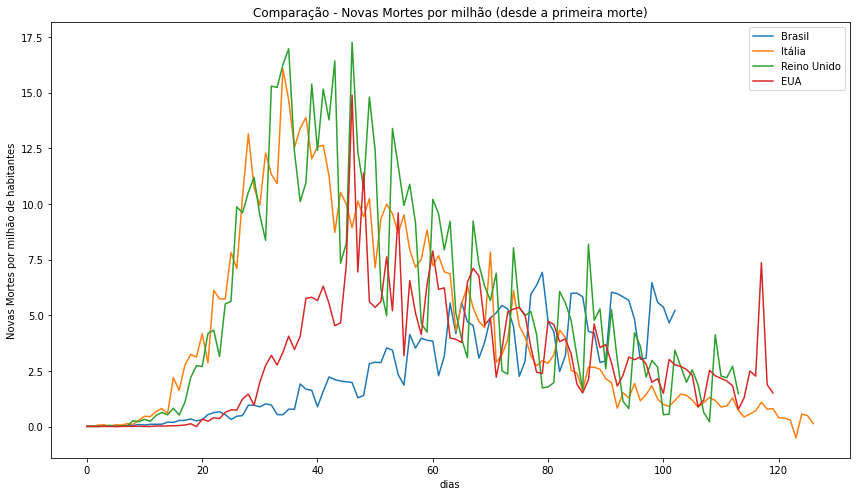

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))

df_brasil_comp.new_deaths_per_million.plot()
df_italy_comp.new_deaths_per_million.plot()
#df_spain_comp.new_deaths_per_million.plot()
df_uk_comp.new_deaths_per_million.plot()
df_usa_comp.new_deaths_per_million.plot()
ax.legend(["Brasil", "Itália","Reino Unido", "EUA"])
ax.set_title("Comparação - Novas Mortes por milhão (desde a primeira morte)")
ax.set_ylabel("Novas Mortes por milhão de habitantes")

plt.tight_layout()

Fica bastante nítido que o Reino Unido e a Itália tiveram um aumento explosivo no número de mortes logo no início da pandemia. Estes índices permaneceram altos por muito tempo, justificando o pânico da população.

Os Estados Unidos tiveram uma evolução mais branda do número relativo de mortes, entretanto apresentou a mesma característica de rápida evolução dos dois países anteriores.

O caso brasileiro é diferente. A evolução é bem mais suave (lembrando mais a famosa "curva achatada"). Embora isto, teoricamente, seja um motivo de comemoração para nós, o número de novas mortes está crescendo. Atualmente os patamares são os mais altos entre os países comparados e devem ser encarados como preocupantes.

A redução do número de mortes deve ser buscada o mais rapidamente possível por meio de políticas de enfrentamento, conscientização e melhoria no atendimento hospitalar.

### Taxa de Letalidade do COVID-19

Por fim, vamos comparar a taxa de letalidade do COVID-19 em alguns países. Ou seja, qual é o precentual das pessoas infectadas que vem a óbito.

Nesse aspecto os brasileiros tem obtido uma menor taxa de letalidade. Atualmente, 4% das pessoas infectadas vem a óbito no Brasil.

A taxa norte-americana é levemente maior, girando em torno de 5%. 

Chama a atenção a alta letalidade no Reino Unido e na Itália, próximos a 14%.

É bastante difícil apontar uma causa para este fenômeno, e esta não pode ser explicada com base nos dados analisados. Com quase toda a certeza diversos estudos médicos devem tratar deste assunto tanto no presente como em um futuro próximo.

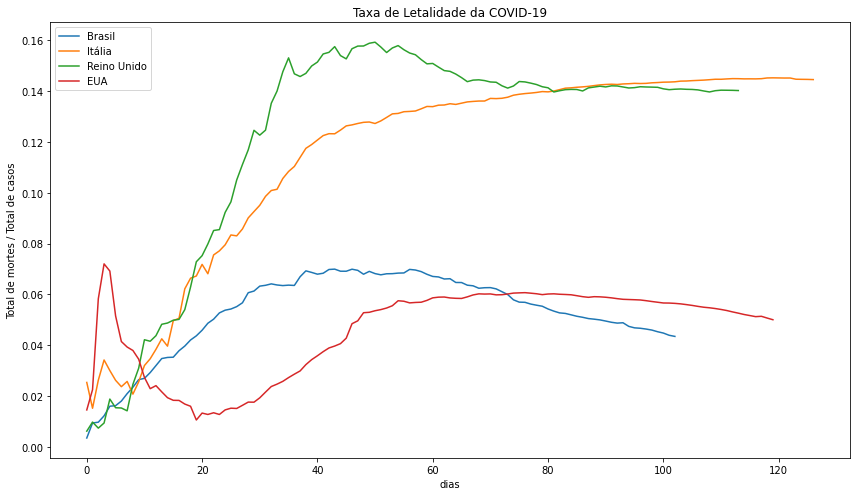

In [23]:
fig, ax = plt.subplots(figsize=(12,7))

(df_brasil_comp.total_deaths/df_brasil_comp.total_cases).plot()
(df_italy_comp.total_deaths/df_italy_comp.total_cases).plot()
(df_uk_comp.total_deaths/df_uk_comp.total_cases).plot()
(df_usa_comp.total_deaths/df_usa_comp.total_cases).plot()
ax.set_title("Taxa de Letalidade da COVID-19")
ax.set_ylabel("Total de mortes / Total de casos")
ax.legend(["Brasil", "Itália","Reino Unido", "EUA"])

plt.tight_layout()

## Conclusão

Este estudo teve por objetivo apresentar alguns dos principais aspectos para o entendimento da pandemia do COVID-19 no Brasil e no mundo.

Na primeira parte foram abordados alguns dos principais indicadores comparando todos os países do mundo. Isto nos permitiu ter uma visão geral do panorama da doença. 

A segunda parte teve por objetivo mostrar a situação brasileira, utilizando na maioria das vezes países que conhecemos dos noticiários como referência. Esta análise nos permite entender melhor o presente e projetar cenários para a evolução da pandemia em solo nacional.

Como é sabido, os dados utilizados podem não retratar a verdade, pois em grande medida eles são dependentes das técnicas de mensuração aplicadas em cada país. De toda forma, a análise dos dados é preciosa, quanto mais em um momento que estamos aprendendo a lidar com esta nova situação.

O banco de dados utilizado poderia gerar diversas outras análises. As informações apresentadas aqui foram as julgadas mais pertinentes para o momento.
Caso seja do seu interesse, acesse os links indicados para baixar os dados e fazer suas análises.

Por fim, caso você tenha alguma pergunta ou sugestão entre em contato com o autor.

Um grande abraço !